## Libraries installation

In [ ]:
!pip install arcade

## Lights Tutorial

#### https://api.arcade.academy/en/latest/tutorials/lights/index.html

In [1]:
"""
Show how to use lights.

.. note:: This uses features from the upcoming version 2.4. The API for these
          functions may still change. To use, you will need to install one of the
          pre-release packages, or install via GitHub.

Artwork from http://kenney.nl

"""
import arcade
from arcade.experimental.lights import Light, LightLayer

SCREEN_WIDTH = 1024
SCREEN_HEIGHT = 768
SCREEN_TITLE = "Lighting Demo"
VIEWPORT_MARGIN = 200
MOVEMENT_SPEED = 5

# This is the color used for 'ambient light'. If you don't want any
# ambient light, set it to black.
AMBIENT_COLOR = (10, 10, 10)

class MyGame(arcade.Window):
    """ Main Game Window """

    def __init__(self, width, height, title):
        """ Set up the class. """
        super().__init__(width, height, title, resizable=True)

        # Sprite lists
        self.background_sprite_list = None
        self.player_list = None
        self.wall_list = None
        self.player_sprite = None

        # Physics engine
        self.physics_engine = None

        # Used for scrolling
        self.view_left = 0
        self.view_bottom = 0

        # --- Light related ---
        # List of all the lights
        self.light_layer = None
        # Individual light we move with player, and turn on/off
        self.player_light = None

    def setup(self):
        """ Create everything """

        # Create sprite lists
        self.background_sprite_list = arcade.SpriteList()
        self.player_list = arcade.SpriteList()
        self.wall_list = arcade.SpriteList()

        # Create player sprite
        self.player_sprite = arcade.Sprite(":resources:images/animated_characters/female_person/femalePerson_idle.png", 0.4)
        self.player_sprite.center_x = 64
        self.player_sprite.center_y = 270
        self.player_list.append(self.player_sprite)

        # --- Light related ---
        # Lights must shine on something. If there is no background sprite or color,
        # you will just see black. Therefore, we use a loop to create a whole bunch of brick tiles to go in the
        # background.
        for x in range(-128, 2000, 128):
            for y in range(-128, 1000, 128):
                sprite = arcade.Sprite(":resources:images/tiles/brickTextureWhite.png")
                sprite.position = x, y
                self.background_sprite_list.append(sprite)

        # Create a light layer, used to render things to, then post-process and
        # add lights. This must match the screen size.
        self.light_layer = LightLayer(SCREEN_WIDTH, SCREEN_HEIGHT)
        # We can also set the background color that will be lit by lights,
        # but in this instance we just want a black background
        self.light_layer.set_background_color(arcade.color.BLACK)

        # Here we create a bunch of lights.

        # Create a small white light
        x = 100
        y = 200
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.WHITE
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        # Create an overlapping, large white light
        x = 300
        y = 150
        radius = 200
        color = arcade.csscolor.WHITE
        mode = 'soft'
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        # Create three, non-overlapping RGB lights
        x = 50
        y = 450
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.RED
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        x = 250
        y = 450
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.GREEN
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        x = 450
        y = 450
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.BLUE
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        # Create three, overlapping RGB lights
        x = 650
        y = 450
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.RED
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        x = 750
        y = 450
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.GREEN
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        x = 850
        y = 450
        radius = 100
        mode = 'soft'
        color = arcade.csscolor.BLUE
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        # Create three, overlapping RGB lights
        # But 'hard' lights that don't fade out.
        x = 650
        y = 150
        radius = 100
        mode = 'hard'
        color = arcade.csscolor.RED
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        x = 750
        y = 150
        radius = 100
        mode = 'hard'
        color = arcade.csscolor.GREEN
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        x = 850
        y = 150
        radius = 100
        mode = 'hard'
        color = arcade.csscolor.BLUE
        light = Light(x, y, radius, color, mode)
        self.light_layer.add(light)

        # Create a light to follow the player around.
        # We'll position it later, when the player moves.
        # We'll only add it to the light layer when the player turns the light
        # on. We start with the light off.
        radius = 150
        mode = 'soft'
        color = arcade.csscolor.WHITE
        self.player_light = Light(0, 0, radius, color, mode)

        # Create the physics engine
        self.physics_engine = arcade.PhysicsEngineSimple(self.player_sprite, self.wall_list)

        # Set the viewport boundaries
        # These numbers set where we have 'scrolled' to.
        self.view_left = 0
        self.view_bottom = 0

    def on_draw(self):
        """ Draw everything. """
        self.clear()

        # --- Light related ---
        # Everything that should be affected by lights gets rendered inside this
        # 'with' statement. Nothing is rendered to the screen yet, just the light
        # layer.
        with self.light_layer:
            self.background_sprite_list.draw()
            self.player_list.draw()

        # Draw the light layer to the screen.
        # This fills the entire screen with the lit version
        # of what we drew into the light layer above.
        self.light_layer.draw(ambient_color=AMBIENT_COLOR)

        # Now draw anything that should NOT be affected by lighting.
        arcade.draw_text("Press SPACE to turn character light on/off.",
                         10 + self.view_left, 10 + self.view_bottom,
                         arcade.color.WHITE, 20)

    def on_resize(self, width, height):
        """ User resizes the screen. """

        # --- Light related ---
        # We need to resize the light layer to
        self.light_layer.resize(width, height)

        # Scroll the screen so the user is visible
        self.scroll_screen()

    def on_key_press(self, key, _):
        """Called whenever a key is pressed. """

        if key == arcade.key.UP:
            self.player_sprite.change_y = MOVEMENT_SPEED
        elif key == arcade.key.DOWN:
            self.player_sprite.change_y = -MOVEMENT_SPEED
        elif key == arcade.key.LEFT:
            self.player_sprite.change_x = -MOVEMENT_SPEED
        elif key == arcade.key.RIGHT:
            self.player_sprite.change_x = MOVEMENT_SPEED
        elif key == arcade.key.SPACE:
            # --- Light related ---
            # We can add/remove lights from the light layer. If they aren't
            # in the light layer, the light is off.
            if self.player_light in self.light_layer:
                self.light_layer.remove(self.player_light)
            else:
                self.light_layer.add(self.player_light)

    def on_key_release(self, key, _):
        """Called when the user releases a key. """

        if key == arcade.key.UP or key == arcade.key.DOWN:
            self.player_sprite.change_y = 0
        elif key == arcade.key.LEFT or key == arcade.key.RIGHT:
            self.player_sprite.change_x = 0

    def scroll_screen(self):
        """ Manage Scrolling """

        # Scroll left
        left_boundary = self.view_left + VIEWPORT_MARGIN
        if self.player_sprite.left < left_boundary:
            self.view_left -= left_boundary - self.player_sprite.left

        # Scroll right
        right_boundary = self.view_left + self.width - VIEWPORT_MARGIN
        if self.player_sprite.right > right_boundary:
            self.view_left += self.player_sprite.right - right_boundary

        # Scroll up
        top_boundary = self.view_bottom + self.height - VIEWPORT_MARGIN
        if self.player_sprite.top > top_boundary:
            self.view_bottom += self.player_sprite.top - top_boundary

        # Scroll down
        bottom_boundary = self.view_bottom + VIEWPORT_MARGIN
        if self.player_sprite.bottom < bottom_boundary:
            self.view_bottom -= bottom_boundary - self.player_sprite.bottom

        # Make sure our boundaries are integer values. While the viewport does
        # support floating point numbers, for this application we want every pixel
        # in the view port to map directly onto a pixel on the screen. We don't want
        # any rounding errors.
        self.view_left = int(self.view_left)
        self.view_bottom = int(self.view_bottom)

        arcade.set_viewport(self.view_left,
                            self.width + self.view_left,
                            self.view_bottom,
                            self.height + self.view_bottom)

    def on_update(self, delta_time):
        """ Movement and game logic """

        # Call update on all sprites (The sprites don't do much in this
        # example though.)
        self.physics_engine.update()

        # --- Light related ---
        # We can easily move the light by setting the position,
        # or by center_x, center_y.
        self.player_light.position = self.player_sprite.position

        # Scroll the screen so we can see the player
        self.scroll_screen()


if __name__ == "__main__":
    window = MyGame(SCREEN_WIDTH, SCREEN_HEIGHT, SCREEN_TITLE)
    window.setup()
    arcade.run()

## Ray-Casting Demo

#### https://api.arcade.academy/en/latest/tutorials/raycasting/start.html#raycasting-start

In [1]:
import random
import arcade

# Do the math to figure out our screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
SCREEN_TITLE = "Ray-casting Demo"

SPRITE_SCALING = 0.25

# How fast the camera pans to the player. 1.0 is instant.
CAMERA_SPEED = 0.1

PLAYER_MOVEMENT_SPEED = 7
BOMB_COUNT = 70
PLAYING_FIELD_WIDTH = 1600
PLAYING_FIELD_HEIGHT = 1600


class MyGame(arcade.Window):

    def __init__(self, width, height, title):
        super().__init__(width, height, title, resizable=True)

        # Sprites and sprite lists
        self.player_sprite = None
        self.wall_list = arcade.SpriteList()
        self.player_list = arcade.SpriteList()
        self.bomb_list = arcade.SpriteList()
        self.physics_engine = None

        self.generate_sprites()
        arcade.set_background_color(arcade.color.ARMY_GREEN)

    def generate_sprites(self):
        # -- Set up several columns of walls
        for x in range(0, PLAYING_FIELD_WIDTH, 128):
            for y in range(0, PLAYING_FIELD_HEIGHT, int(128 * SPRITE_SCALING)):
                # Randomly skip a box so the player can find a way through
                if random.randrange(2) > 0:
                    wall = arcade.Sprite(":resources:images/tiles/boxCrate_double.png", SPRITE_SCALING)
                    wall.center_x = x
                    wall.center_y = y
                    self.wall_list.append(wall)

        # -- Set some hidden bombs in the area
        for i in range(BOMB_COUNT):
            bomb = arcade.Sprite(":resources:images/tiles/bomb.png", 0.25)
            placed = False
            while not placed:
                bomb.center_x = random.randrange(PLAYING_FIELD_WIDTH)
                bomb.center_y = random.randrange(PLAYING_FIELD_HEIGHT)
                if not arcade.check_for_collision_with_list(bomb, self.wall_list):
                    placed = True
            self.bomb_list.append(bomb)

        # Create the player
        self.player_sprite = arcade.Sprite(":resources:images/animated_characters/female_person/femalePerson_idle.png",
                                           scale=SPRITE_SCALING)
        self.player_sprite.center_x = 256
        self.player_sprite.center_y = 512
        self.player_list.append(self.player_sprite)

        # Physics engine, so we don't run into walls
        self.physics_engine = arcade.PhysicsEngineSimple(self.player_sprite, self.wall_list)

    def on_draw(self):
        self.clear()

        self.wall_list.draw()
        self.bomb_list.draw()
        self.player_list.draw()

    def on_key_press(self, key, modifiers):
        """Called whenever a key is pressed. """

        if key == arcade.key.UP:
            self.player_sprite.change_y = PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.DOWN:
            self.player_sprite.change_y = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.LEFT:
            self.player_sprite.change_x = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.RIGHT:
            self.player_sprite.change_x = PLAYER_MOVEMENT_SPEED

    def on_key_release(self, key, modifiers):
        """Called when the user releases a key. """

        if key == arcade.key.UP or key == arcade.key.DOWN:
            self.player_sprite.change_y = 0
        elif key == arcade.key.LEFT or key == arcade.key.RIGHT:
            self.player_sprite.change_x = 0

    def on_update(self, delta_time):
        """ Movement and game logic """

        # Call update on all sprites (The sprites don't do much in this
        # example though.)
        self.physics_engine.update()


if __name__ == "__main__":
    MyGame(SCREEN_WIDTH, SCREEN_HEIGHT, SCREEN_TITLE)
    arcade.run()

## RayCasting Tutorial: parts to add in

In [2]:
from arcade.experimental import Shadertoy

In [3]:
def __init__(self, width, height, title):
    super().__init__(width, height, title)


    # The shader toy and 'channels' we'll be using

    self.shadertoy = None

    self.channel0 = None

    self.channel1 = None

    self.load_shader()


    # Sprites and sprite lists
    self.player_sprite = None
    self.wall_list = arcade.SpriteList()
    self.player_list = arcade.SpriteList()
    self.bomb_list = arcade.SpriteList()
    self.physics_engine = None

    self.generate_sprites()
    arcade.set_background_color(arcade.color.ARMY_GREEN)

In [4]:
def load_shader(self):
    # Where is the shader file? Must be specified as a path.
    shader_file_path = Path("step_01.glsl")

    # Size of the window
    window_size = self.get_size()

    # Create the shader toy
    self.shadertoy = Shadertoy.create_from_file(window_size, shader_file_path)

    # Create the channels 0 and 1 frame buffers.
    # Make the buffer the size of the window, with 4 channels (RGBA)
    self.channel0 = self.shadertoy.ctx.framebuffer(
        color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
    )
    self.channel1 = self.shadertoy.ctx.framebuffer(
        color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
    )

    # Assign the frame buffers to the channels
    self.shadertoy.channel_0 = self.channel0.color_attachments[0]
    self.shadertoy.channel_1 = self.channel1.color_attachments[0]

## RayCasting Tutorial Final

Shadertoy has four built-in channels that our shader programs can work with. Channels can be mapped to FBOs. This allows us to pass image data to our shader program for it to process. The four channels are numbered 0 to 3.

We’ll be using two channels to cast shadows. We will use the channel0 variable to hold our barriers that can cast shadows. We will use the channel1 variable to hold the ground, bombs, or anything we want to be hidden by shadows.

#### Step 03->

In [1]:
import random
from pathlib import Path

import arcade
from arcade.experimental import Shadertoy

# Do the math to figure out our screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
SCREEN_TITLE = "Ray-casting Demo"

SPRITE_SCALING = 0.25

# How fast the camera pans to the player. 1.0 is instant.
CAMERA_SPEED = 0.1

PLAYER_MOVEMENT_SPEED = 7
BOMB_COUNT = 70
PLAYING_FIELD_WIDTH = 1600
PLAYING_FIELD_HEIGHT = 1600


class MyGame(arcade.Window):

    def __init__(self, width, height, title):
        super().__init__(width, height, title)

        # The shader toy and 'channels' we'll be using
        self.shadertoy = None
        self.channel0 = None
        self.channel1 = None
        self.load_shader()

        # Sprites and sprite lists
        self.player_sprite = None
        self.wall_list = arcade.SpriteList()
        self.player_list = arcade.SpriteList()
        self.bomb_list = arcade.SpriteList()
        self.physics_engine = None

        self.generate_sprites()
        arcade.set_background_color(arcade.color.ARMY_GREEN)

    def load_shader(self):
        # Where is the shader file? Must be specified as a path.
        shader_file_path = Path("step_06.glsl")

        # Size of the window
        window_size = self.get_size()

        # Create the shader toy
        self.shadertoy = Shadertoy.create_from_file(window_size, shader_file_path)

        # Create the channels 0 and 1 frame buffers.
        # Make the buffer the size of the window, with 4 channels (RGBA)
        self.channel0 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )
        self.channel1 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )

        # Assign the frame buffers to the channels
        self.shadertoy.channel_0 = self.channel0.color_attachments[0]
        self.shadertoy.channel_1 = self.channel1.color_attachments[0]

    def generate_sprites(self):
        # -- Set up several columns of walls
        for x in range(0, PLAYING_FIELD_WIDTH, 128):
            for y in range(0, PLAYING_FIELD_HEIGHT, int(128 * SPRITE_SCALING)):
                # Randomly skip a box so the player can find a way through
                if random.randrange(2) > 0:
                    wall = arcade.Sprite(":resources:images/tiles/boxCrate_double.png", SPRITE_SCALING)
                    wall.center_x = x
                    wall.center_y = y
                    self.wall_list.append(wall)

        # -- Set some hidden bombs in the area
        for i in range(BOMB_COUNT):
            bomb = arcade.Sprite(":resources:images/tiles/bomb.png", 0.25)
            placed = False
            while not placed:
                bomb.center_x = random.randrange(PLAYING_FIELD_WIDTH)
                bomb.center_y = random.randrange(PLAYING_FIELD_HEIGHT)
                if not arcade.check_for_collision_with_list(bomb, self.wall_list):
                    placed = True
            self.bomb_list.append(bomb)

        # Create the player
        self.player_sprite = arcade.Sprite(":resources:images/animated_characters/female_person/femalePerson_idle.png",
                                           scale=SPRITE_SCALING)
        self.player_sprite.center_x = 256
        self.player_sprite.center_y = 512
        self.player_list.append(self.player_sprite)

        # Physics engine, so we don't run into walls
        self.physics_engine = arcade.PhysicsEngineSimple(self.player_sprite, self.wall_list)

    def on_draw(self):
        # Select the channel 0 frame buffer to draw on
        self.channel0.use()
        self.channel0.clear()
        # Draw the walls
        self.wall_list.draw()
        
        self.channel1.use()
        self.channel1.clear()
        # Draw the bombs
        self.bomb_list.draw()

        # Select this window to draw on
        self.use()
        # Clear to background color
        self.clear()
        # Run the shader and render to the window
        self.shadertoy.program['lightPosition'] = self.player_sprite.position
        self.shadertoy.program['lightSize'] = 300
        self.shadertoy.render()
        
        # Draw the walls after light has been calculated
        self.wall_list.draw()

        # Draw the player
        self.player_list.draw()

    def on_key_press(self, key, modifiers):
        """Called whenever a key is pressed. """

        if key == arcade.key.UP:
            self.player_sprite.change_y = PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.DOWN:
            self.player_sprite.change_y = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.LEFT:
            self.player_sprite.change_x = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.RIGHT:
            self.player_sprite.change_x = PLAYER_MOVEMENT_SPEED

    def on_key_release(self, key, modifiers):
        """Called when the user releases a key. """

        if key == arcade.key.UP or key == arcade.key.DOWN:
            self.player_sprite.change_y = 0
        elif key == arcade.key.LEFT or key == arcade.key.RIGHT:
            self.player_sprite.change_x = 0

    def on_update(self, delta_time):
        """ Movement and game logic """

        # Call update on all sprites (The sprites don't do much in this
        # example though.)
        self.physics_engine.update()


if __name__ == "__main__":
    MyGame(SCREEN_WIDTH, SCREEN_HEIGHT, SCREEN_TITLE)
    arcade.run()

#### Step 01 -> Step 02

In [1]:
import random
from pathlib import Path

import arcade
from arcade.experimental import Shadertoy

# Do the math to figure out our screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
SCREEN_TITLE = "Ray-casting Demo"

SPRITE_SCALING = 0.25

# How fast the camera pans to the player. 1.0 is instant.
CAMERA_SPEED = 0.1

PLAYER_MOVEMENT_SPEED = 7
BOMB_COUNT = 70
PLAYING_FIELD_WIDTH = 1600
PLAYING_FIELD_HEIGHT = 1600


class MyGame(arcade.Window):

    def __init__(self, width, height, title):
        super().__init__(width, height, title)

        # The shader toy and 'channels' we'll be using
        self.shadertoy = None
        self.channel0 = None
        self.channel1 = None
        self.load_shader()

        # Sprites and sprite lists
        self.player_sprite = None
        self.wall_list = arcade.SpriteList()
        self.player_list = arcade.SpriteList()
        self.bomb_list = arcade.SpriteList()
        self.physics_engine = None

        self.generate_sprites()
        arcade.set_background_color(arcade.color.ARMY_GREEN)

    def load_shader(self):
        # Where is the shader file? Must be specified as a path.
        shader_file_path = Path("step_03.glsl")

        # Size of the window
        window_size = self.get_size()

        # Create the shader toy
        self.shadertoy = Shadertoy.create_from_file(window_size, shader_file_path)

        # Create the channels 0 and 1 frame buffers.
        # Make the buffer the size of the window, with 4 channels (RGBA)
        self.channel0 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )
        self.channel1 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )

        # Assign the frame buffers to the channels
        self.shadertoy.channel_0 = self.channel0.color_attachments[0]
        self.shadertoy.channel_1 = self.channel1.color_attachments[0]

    def generate_sprites(self):
        # -- Set up several columns of walls
        for x in range(0, PLAYING_FIELD_WIDTH, 128):
            for y in range(0, PLAYING_FIELD_HEIGHT, int(128 * SPRITE_SCALING)):
                # Randomly skip a box so the player can find a way through
                if random.randrange(2) > 0:
                    wall = arcade.Sprite(":resources:images/tiles/boxCrate_double.png", SPRITE_SCALING)
                    wall.center_x = x
                    wall.center_y = y
                    self.wall_list.append(wall)

        # -- Set some hidden bombs in the area
        for i in range(BOMB_COUNT):
            bomb = arcade.Sprite(":resources:images/tiles/bomb.png", 0.25)
            placed = False
            while not placed:
                bomb.center_x = random.randrange(PLAYING_FIELD_WIDTH)
                bomb.center_y = random.randrange(PLAYING_FIELD_HEIGHT)
                if not arcade.check_for_collision_with_list(bomb, self.wall_list):
                    placed = True
            self.bomb_list.append(bomb)

        # Create the player
        self.player_sprite = arcade.Sprite(":resources:images/animated_characters/female_person/femalePerson_idle.png",
                                           scale=SPRITE_SCALING)
        self.player_sprite.center_x = 256
        self.player_sprite.center_y = 512
        self.player_list.append(self.player_sprite)

        # Physics engine, so we don't run into walls
        self.physics_engine = arcade.PhysicsEngineSimple(self.player_sprite, self.wall_list)

    def on_draw(self):
        # Select the channel 0 frame buffer to draw on
        self.channel0.use()
        self.channel0.clear()
        # Draw the walls
        self.wall_list.draw()

        # Select this window to draw on
        self.use()
        # Clear to background color
        self.clear()
        # Run the shader and render to the window
        self.shadertoy.render()

    def on_key_press(self, key, modifiers):
        """Called whenever a key is pressed. """

        if key == arcade.key.UP:
            self.player_sprite.change_y = PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.DOWN:
            self.player_sprite.change_y = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.LEFT:
            self.player_sprite.change_x = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.RIGHT:
            self.player_sprite.change_x = PLAYER_MOVEMENT_SPEED

    def on_key_release(self, key, modifiers):
        """Called when the user releases a key. """

        if key == arcade.key.UP or key == arcade.key.DOWN:
            self.player_sprite.change_y = 0
        elif key == arcade.key.LEFT or key == arcade.key.RIGHT:
            self.player_sprite.change_x = 0

    def on_update(self, delta_time):
        """ Movement and game logic """

        
        # Call update on all sprites (The sprites don't do much in this
        # example though.)
        self.physics_engine.update()



if __name__ == "__main__":
    MyGame(SCREEN_WIDTH, SCREEN_HEIGHT, SCREEN_TITLE)
    arcade.run()

TypeError: 'NoneType' object is not subscriptable

## Trying to make bombs disappear when collided with

In [1]:
import random
from pathlib import Path

import arcade
from arcade.experimental import Shadertoy

# Do the math to figure out our screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
SCREEN_TITLE = "Ray-casting Demo"

SPRITE_SCALING = 0.25

# How fast the camera pans to the player. 1.0 is instant.
CAMERA_SPEED = 0.1

PLAYER_MOVEMENT_SPEED = 7
BOMB_COUNT = 70
PLAYING_FIELD_WIDTH = 1600
PLAYING_FIELD_HEIGHT = 1600


class MyGame(arcade.Window):

    def __init__(self, width, height, title):
        super().__init__(width, height, title)

        # The shader toy and 'channels' we'll be using
        self.shadertoy = None
        self.channel0 = None
        self.channel1 = None
        self.load_shader()

        # Sprites and sprite lists
        self.player_sprite = None
        self.wall_list = arcade.SpriteList()
        self.player_list = arcade.SpriteList()
        self.bomb_list = arcade.SpriteList()
        self.physics_engine = None
        
        self.gui_camera = None #TF added gui camera that can be used to draw gui elements
        self.score = 0 #TF added score
        self.scene = None #TF added scene

        self.generate_sprites()
        
        #TF: Load sounds
        self.collect_bomb_sound = arcade.load_sound(":resources:sounds/explosion2.wav")

        arcade.set_background_color(arcade.color.ARMY_GREEN)

    def load_shader(self):
        # Where is the shader file? Must be specified as a path.
        shader_file_path = Path("step_06.glsl")

        # Size of the window
        window_size = self.get_size()

        # Create the shader toy
        self.shadertoy = Shadertoy.create_from_file(window_size, shader_file_path)

        # Create the channels 0 and 1 frame buffers.
        # Make the buffer the size of the window, with 4 channels (RGBA)
        self.channel0 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )
        self.channel1 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )

        # Assign the frame buffers to the channels
        self.shadertoy.channel_0 = self.channel0.color_attachments[0]
        self.shadertoy.channel_1 = self.channel1.color_attachments[0]

    def generate_sprites(self):
        self.scene = arcade.Scene() # TF initialise scene
        self.gui_camera = arcade.Camera(self.width, self.height) #TF initialise GUI camera for displaying score
        self.score = 0 #TF keep track of the score
        
        # -- Set up several columns of walls
        for x in range(0, PLAYING_FIELD_WIDTH, 128):
            for y in range(0, PLAYING_FIELD_HEIGHT, int(128 * SPRITE_SCALING)):
                # Randomly skip a box so the player can find a way through
                if random.randrange(2) > 0:
                    wall = arcade.Sprite(":resources:images/tiles/boxCrate_double.png", SPRITE_SCALING)
                    wall.center_x = x
                    wall.center_y = y
                    self.wall_list.append(wall)

        # -- Set some hidden bombs in the area
        for i in range(BOMB_COUNT):
            bomb = arcade.Sprite(":resources:images/tiles/bomb.png", 0.25)
            placed = False
            while not placed:
                bomb.center_x = random.randrange(PLAYING_FIELD_WIDTH)
                bomb.center_y = random.randrange(PLAYING_FIELD_HEIGHT)
                if not arcade.check_for_collision_with_list(bomb, self.wall_list):
                    placed = True
            self.bomb_list.append(bomb)
            self.scene.add_sprite("Bombs", bomb) # TF add bombs to scene

        # Create the player
        self.player_sprite = arcade.Sprite(":resources:images/animated_characters/female_person/femalePerson_idle.png",
                                           scale=SPRITE_SCALING)
        self.player_sprite.center_x = 256
        self.player_sprite.center_y = 512
        self.player_list.append(self.player_sprite)

        # Physics engine, so we don't run into walls
        self.physics_engine = arcade.PhysicsEngineSimple(self.player_sprite, self.wall_list)

    def on_draw(self):
        # Select the channel 0 frame buffer to draw on
        self.channel0.use()
        self.channel0.clear()
        # Draw the walls
        self.wall_list.draw()
        
        self.channel1.use()
        self.channel1.clear()
        # Draw the bombs
        self.bomb_list.draw()

        # Select this window to draw on
        self.use()
        # Clear to background color
        self.clear()
        

        # Run the shader and render to the window
        self.shadertoy.program['lightPosition'] = self.player_sprite.position
        self.shadertoy.program['lightSize'] = 300
        self.shadertoy.render()
        
        # Draw the walls after light has been calculated
        self.wall_list.draw()

        #TF: Adding camera to display score AFTER light has been calculated
        #Activate the GUI camera before drawing GUI elements
        self.gui_camera.use()
        
        #Draw our score on the screen, scrolling it with the viewport
        score_text = f"score: {self.score}"
        arcade.draw_text(
            score_text,
            10,
            10,
            arcade.csscolor.WHITE,
            18,
        )
        
        # Draw the player
        self.player_list.draw()

    def on_key_press(self, key, modifiers):
        """Called whenever a key is pressed. """

        if key == arcade.key.UP:
            self.player_sprite.change_y = PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.DOWN:
            self.player_sprite.change_y = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.LEFT:
            self.player_sprite.change_x = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.RIGHT:
            self.player_sprite.change_x = PLAYER_MOVEMENT_SPEED

    def on_key_release(self, key, modifiers):
        """Called when the user releases a key. """

        if key == arcade.key.UP or key == arcade.key.DOWN:
            self.player_sprite.change_y = 0
        elif key == arcade.key.LEFT or key == arcade.key.RIGHT:
            self.player_sprite.change_x = 0

    def on_update(self, delta_time):
        """ Movement and game logic """

        # Call update on all sprites (The sprites don't do much in this
        # example though.)
        self.physics_engine.update()
        #TF testing:
        #See if we hit any bombs
        bomb_hit_list = arcade.check_for_collision_with_list(
            self.player_sprite, self.scene["Bombs"]
        )
        
        #Loop through each bomb we hit (if any) and remove it
        for bomb in bomb_hit_list:
            #Remove the bomb
            bomb.remove_from_sprite_lists()
            #Play a sound
            arcade.play_sound(self.collect_bomb_sound)
            #Minus 1 to score
            self.score -= 1

def main():
    """Main Function"""
    window = MyGame(SCREEN_WIDTH, SCREEN_HEIGHT, SCREEN_TITLE)
#     window.setup()
    arcade.run()

if __name__ == "__main__":
    main()

In [1]:
import random
from pathlib import Path

import arcade
from arcade.experimental import Shadertoy

# Do the math to figure out our screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600
SCREEN_TITLE = "Ray-casting Demo"

SPRITE_SCALING = 0.25

# How fast the camera pans to the player. 1.0 is instant.
CAMERA_SPEED = 0.1

PLAYER_MOVEMENT_SPEED = 7
BOMB_COUNT = 70
PLAYING_FIELD_WIDTH = 1600
PLAYING_FIELD_HEIGHT = 1600


class MyGame(arcade.Window):

    def __init__(self, width, height, title):
        super().__init__(width, height, title)

        # The shader toy and 'channels' we'll be using
        self.shadertoy = None
        self.channel0 = None
        self.channel1 = None
        self.load_shader()

        # Sprites and sprite lists
        self.player_sprite = None
        self.wall_list = arcade.SpriteList()
        self.player_list = arcade.SpriteList()
        self.bomb_list = arcade.SpriteList()
        self.physics_engine = None
        self.score = 0 #TF added score
        self.scene = None #TF added scene

        self.generate_sprites()
        
        #TF: Load sounds
        self.collect_bomb_sound = arcade.load_sound(":resources:sounds/coin1.wav")
        
        arcade.set_background_color(arcade.color.ARMY_GREEN)

    def load_shader(self):
        # Where is the shader file? Must be specified as a path.
        shader_file_path = Path("step_03.glsl")

        # Size of the window
        window_size = self.get_size()

        # Create the shader toy
        self.shadertoy = Shadertoy.create_from_file(window_size, shader_file_path)

        # Create the channels 0 and 1 frame buffers.
        # Make the buffer the size of the window, with 4 channels (RGBA)
        self.channel0 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )
        self.channel1 = self.shadertoy.ctx.framebuffer(
            color_attachments=[self.shadertoy.ctx.texture(window_size, components=4)]
        )

        # Assign the frame buffers to the channels
        self.shadertoy.channel_0 = self.channel0.color_attachments[0]
        self.shadertoy.channel_1 = self.channel1.color_attachments[0]

    def generate_sprites(self):
        # -- Set up several columns of walls
        for x in range(0, PLAYING_FIELD_WIDTH, 128):
            for y in range(0, PLAYING_FIELD_HEIGHT, int(128 * SPRITE_SCALING)):
                # Randomly skip a box so the player can find a way through
                if random.randrange(2) > 0:
                    wall = arcade.Sprite(":resources:images/tiles/boxCrate_double.png", SPRITE_SCALING)
                    wall.center_x = x
                    wall.center_y = y
                    self.wall_list.append(wall)

        # -- Set some hidden bombs in the area
        for i in range(BOMB_COUNT):
            bomb = arcade.Sprite(":resources:images/tiles/bomb.png", 0.25)
            placed = False
            while not placed:
                bomb.center_x = random.randrange(PLAYING_FIELD_WIDTH)
                bomb.center_y = random.randrange(PLAYING_FIELD_HEIGHT)
                if not arcade.check_for_collision_with_list(bomb, self.wall_list):
                    placed = True
            self.bomb_list.append(bomb)

        # Create the player
        self.player_sprite = arcade.Sprite(":resources:images/animated_characters/female_person/femalePerson_idle.png",
                                           scale=SPRITE_SCALING)
        self.player_sprite.center_x = 256
        self.player_sprite.center_y = 512
        self.player_list.append(self.player_sprite)

        # Physics engine, so we don't run into walls
        self.physics_engine = arcade.PhysicsEngineSimple(self.player_sprite, self.wall_list)

    def on_draw(self):
        # Select the channel 0 frame buffer to draw on
        self.channel0.use()
        self.channel0.clear()
        # Draw the walls
        self.wall_list.draw()

        # Select this window to draw on
        self.use()
        # Clear to background color
        self.clear()
        # Run the shader and render to the window
        self.shadertoy.render()

    def on_key_press(self, key, modifiers):
        """Called whenever a key is pressed. """

        if key == arcade.key.UP:
            self.player_sprite.change_y = PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.DOWN:
            self.player_sprite.change_y = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.LEFT:
            self.player_sprite.change_x = -PLAYER_MOVEMENT_SPEED
        elif key == arcade.key.RIGHT:
            self.player_sprite.change_x = PLAYER_MOVEMENT_SPEED

    def on_key_release(self, key, modifiers):
        """Called when the user releases a key. """

        if key == arcade.key.UP or key == arcade.key.DOWN:
            self.player_sprite.change_y = 0
        elif key == arcade.key.LEFT or key == arcade.key.RIGHT:
            self.player_sprite.change_x = 0

    def on_update(self, delta_time):
        """ Movement and game logic """

        
        # Call update on all sprites (The sprites don't do much in this
        # example though.)
        self.physics_engine.update()
        #TF testing:
        #See if we hit any bombs
        bomb_hit_list = arcade.check_for_collision_with_list(
            self.player_sprite, self.scene["Bombs"]
        )
        
        #Loop through each bomb we hit (if any) and remove it
        for bomb in bomb_hit_list:
            #Remove the bomb
            bomb.remove_from_sprite_lists()
            #Play a sound
            arcade.play_sound(self.collect_bomb_sound)
            #Minus 1 to score
            self.score -= 1



if __name__ == "__main__":
    MyGame(SCREEN_WIDTH, SCREEN_HEIGHT, SCREEN_TITLE)
    arcade.run()

## Using Simple Playgrounds to create first environment

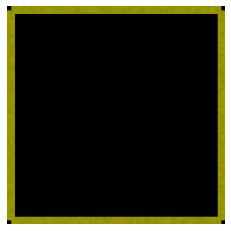

In [8]:
from simple_playgrounds.playgrounds.layouts import SingleRoom
from simple_playgrounds.engine import Engine

%matplotlib inline
import matplotlib.pyplot as plt

def plt_image(img):
    plt.axis('off')
    plt.imshow(img)
    plt.show()

my_playground = SingleRoom(size=(300, 300))

# we use the option screen=True to use a keyboard controlled agent later on.
engine = Engine(time_limit=10000, playground=my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

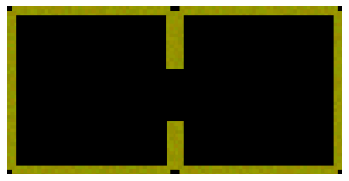

In [9]:
from simple_playgrounds.playgrounds.layouts import LineRooms, GridRooms
from simple_playgrounds.engine import Engine

my_playground = LineRooms(size=(400, 200), number_rooms=2, random_doorstep_position=True, doorstep_size=60)
engine = Engine(time_limit=10000, playground=my_playground, screen=False)

plt_image(engine.generate_playground_image(plt_mode=True))

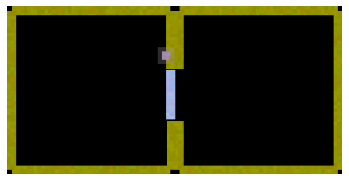

In [10]:
from simple_playgrounds.elements.collection.activable import OpenCloseSwitch

# Generate a door for a doorstep

room_left = my_playground.grid_rooms[0][0]

doorstep = room_left.doorstep_right

door = doorstep.generate_door()
my_playground.add_element(door)

switch = OpenCloseSwitch(door=door)
position_switch = room_left.get_random_position_on_wall(wall_location='right', element=switch)
my_playground.add_element(switch, position_switch)

plt_image(engine.generate_playground_image(plt_mode=True))


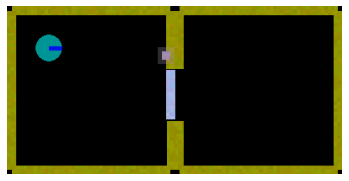

KeyboardInterrupt: 

In [11]:
from simple_playgrounds.agents.parts.controllers import Keyboard
from simple_playgrounds.agents.agents import BaseAgent

my_agent = BaseAgent(controller=Keyboard(), interactive=True)
my_playground.add_agent(my_agent, ((50, 50), 0))

engine = Engine(time_limit=10000, playground=my_playground, screen=True)

plt_image(engine.generate_playground_image(plt_mode=True))

engine.run(update_screen=True)
engine.terminate()

## Headless mode

In [ ]:
import os
# os.environ['PYOPENGL_PLATFORM'] = 'egl'

In [ ]:
!pip install pyrender

In [ ]:
print(os.environ)

In [ ]:
from pyglet.libs.egl import egl

In [4]:
# import os
# os.environ["ARCADE_HEADLESS"] = "false"
# # from pyglet.libs.egl import egl


# import arcade

class App(arcade.Window):

    def __init__(self):
        super().__init__(200, 200)
        self.frame = 0
        self.sprite = arcade.Sprite(
            ":resources:images/animated_characters/female_adventurer/femaleAdventurer_idle.png",
            center_x=self.width / 2,
            center_y=self.height / 2,
        )

    def on_draw(self):
        self.clear()
        self.sprite.draw()

        # Dump the window framebuffer to disk
        image = arcade.get_image(0, 0, *self.get_size())
        image.save("framebuffer.png")

    def on_update(self, delta_time: float):
        # Close the window on the second frame
        if self.frame == 2:
            self.close()

        self.frame += 1

App().run()

In [ ]:
!pip install pyglet==2.0.dev18

In [ ]:
!pip install PyOpenGL

In [ ]:
!pip install PyOpenGL_accelerate

In [ ]:
!pip install arcade

In [5]:
!apt install libosmesa6-dev

'apt' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# ----------------------------------------------------------------------------
# pyglet
# Copyright (c) 2006-2008 Alex Holkner
# Copyright (c) 2008-2022 pyglet contributors
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions
# are met:
#
#  * Redistributions of source code must retain the above copyright
#    notice, this list of conditions and the following disclaimer.
#  * Redistributions in binary form must reproduce the above copyright
#    notice, this list of conditions and the following disclaimer in
#    the documentation and/or other materials provided with the
#    distribution.
#  * Neither the name of pyglet nor the names of its
#    contributors may be used to endorse or promote products
#    derived from this software without specific prior written
#    permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS
# "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT
# LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS
# FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE
# COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT,
# INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING,
# BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
# LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
# CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT
# LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN
# ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE
# POSSIBILITY OF SUCH DAMAGE.
# ----------------------------------------------------------------------------
"""Functions for loading dynamic libraries.

These extend and correct ctypes functions.
"""

import os
import re
import sys

import ctypes
import ctypes.util

import pyglet

_debug_lib = pyglet.options['debug_lib']
_debug_trace = pyglet.options['debug_trace']

_is_pyglet_doc_run = getattr(sys, "is_pyglet_doc_run", False)

if pyglet.options['search_local_libs']:
    script_path = pyglet.resource.get_script_home()
    cwd = os.getcwd()
    _local_lib_paths = [script_path, os.path.join(script_path, 'lib'), os.path.join(cwd, 'lib')]
    if pyglet.compat_platform == 'win32':
        os.environ["PATH"] += os.pathsep + os.pathsep.join(_local_lib_paths)
else:
    _local_lib_paths = None


class _TraceFunction:
    def __init__(self, func):
        self.__dict__['_func'] = func

    def __str__(self):
        return self._func.__name__

    def __call__(self, *args, **kwargs):
        return self._func(*args, **kwargs)

    def __getattr__(self, name):
        return getattr(self._func, name)

    def __setattr__(self, name, value):
        setattr(self._func, name, value)


class _TraceLibrary:
    def __init__(self, library):
        self._library = library
        print(library)

    def __getattr__(self, name):
        func = getattr(self._library, name)
        f = _TraceFunction(func)
        return f


if _is_pyglet_doc_run:
    class LibraryMock:
        """Mock library used when generating documentation."""
        def __getattr__(self, name):
            return LibraryMock()

        def __setattr__(self, name, value):
            pass

        def __call__(self, *args, **kwargs):
            return LibraryMock()

        def __rshift__(self, other):
            return 0


class LibraryLoader:

    platform = pyglet.compat_platform
    # this is only for library loading, don't include it in pyglet.platform
    if platform == 'cygwin':
        platform = 'win32'

    def load_library(self, *names, **kwargs):
        """Find and load a library.  
        
        More than one name can be specified, they will be tried in order.
        Platform-specific library names (given as kwargs) are tried first.

        Raises ImportError if library is not found.
        """
        if _is_pyglet_doc_run:
            return LibraryMock()

        if 'framework' in kwargs and self.platform == 'darwin':
            return self.load_framework(kwargs['framework'])

        if not names:
            raise ImportError("No library name specified")

        platform_names = kwargs.get(self.platform, [])
        if isinstance(platform_names, str):
            platform_names = [platform_names]
        elif type(platform_names) is tuple:
            platform_names = list(platform_names)

        if self.platform.startswith('linux'):
            for name in names:
                libname = self.find_library(name)
                platform_names.append(libname or 'lib%s.so' % name)

        platform_names.extend(names)
        for name in platform_names:
            try:
                lib = ctypes.cdll.LoadLibrary(name)
                if _debug_lib:
                    print(name, self.find_library(name))
                if _debug_trace:
                    lib = _TraceLibrary(lib)
                return lib
            except OSError as o:
                path = self.find_library(name)
                if path:
                    try:
                        lib = ctypes.cdll.LoadLibrary(path)
                        if _debug_lib:
                            print(path)
                        if _debug_trace:
                            lib = _TraceLibrary(lib)
                        return lib
                    except OSError:
                        pass
                elif self.platform == "win32" and o.winerror != 126:
                    if _debug_lib:
                        print(f"Unexpected error loading library {name}: {str(o)}")

        raise ImportError('Library "%s" not found.' % names[0])

    def find_library(self, name):
        return ctypes.util.find_library(name)

    @staticmethod
    def load_framework(name):
        raise RuntimeError("Can't load framework on this platform.")


class MachOLibraryLoader(LibraryLoader):
    def __init__(self):
        if 'LD_LIBRARY_PATH' in os.environ:
            self.ld_library_path = os.environ['LD_LIBRARY_PATH'].split(':')
        else:
            self.ld_library_path = []

        if _local_lib_paths:
            # search first for local libs
            self.ld_library_path = _local_lib_paths + self.ld_library_path
            os.environ['LD_LIBRARY_PATH'] = ':'.join(self.ld_library_path)

        if 'DYLD_LIBRARY_PATH' in os.environ:
            self.dyld_library_path = os.environ['DYLD_LIBRARY_PATH'].split(':')
        else:
            self.dyld_library_path = []

        if 'DYLD_FALLBACK_LIBRARY_PATH' in os.environ:
            self.dyld_fallback_library_path = os.environ['DYLD_FALLBACK_LIBRARY_PATH'].split(':')
        else:
            self.dyld_fallback_library_path = [os.path.expanduser('~/lib'), '/usr/local/lib', '/usr/lib']

    def find_library(self, path):
        """Implements the dylib search as specified in Apple documentation:

        http://developer.apple.com/library/content/documentation/DeveloperTools/Conceptual/DynamicLibraries/100-Articles/DynamicLibraryUsageGuidelines.html

        Before commencing the standard search, the method first checks
        the bundle's ``Frameworks`` directory if the application is running
        within a bundle (OS X .app).
        """

        libname = os.path.basename(path)
        search_path = []

        if '.dylib' not in libname:
            libname = 'lib' + libname + '.dylib'

        # py2app support
        if getattr(sys, 'frozen', None) == 'macosx_app' and 'RESOURCEPATH' in os.environ:
            search_path.append(os.path.join(os.environ['RESOURCEPATH'],
                                            '..',
                                            'Frameworks',
                                            libname))

        # conda support
        if os.environ.get('CONDA_PREFIX', False):
            search_path.append(os.path.join(os.environ['CONDA_PREFIX'], 'lib', libname))

        # pyinstaller.py sets sys.frozen to True, and puts dylibs in
        # Contents/macOS, which path pyinstaller puts in sys._MEIPASS
        if getattr(sys, 'frozen', False) and getattr(sys, '_MEIPASS', None):
            meipass = getattr(sys, '_MEIPASS')
            search_path.append(os.path.join(meipass, libname))

        # conda support
        if os.environ.get('CONDA_PREFIX', False):
            search_path.append(os.path.join(os.environ['CONDA_PREFIX'], 'lib', libname))

        if '/' in path:
            search_path.extend([os.path.join(p, libname) for p in self.dyld_library_path])
            search_path.append(path)
            search_path.extend([os.path.join(p, libname) for p in self.dyld_fallback_library_path])
        else:
            search_path.extend([os.path.join(p, libname) for p in self.ld_library_path])
            search_path.extend([os.path.join(p, libname) for p in self.dyld_library_path])
            search_path.append(path)
            search_path.extend([os.path.join(p, libname) for p in self.dyld_fallback_library_path])

        for path in search_path:
            if os.path.exists(path):
                return path

        return None

    @staticmethod
    def load_framework(name):
        path = ctypes.util.find_library(name)

        # Hack for compatibility with macOS > 11.0
        if path is None:
            frameworks = {
                'AGL': '/System/Library/Frameworks/AGL.framework/AGL',
                'IOKit': '/System/Library/Frameworks/IOKit.framework/IOKit',
                'OpenAL': '/System/Library/Frameworks/OpenAL.framework/OpenAL',
                'OpenGL': '/System/Library/Frameworks/OpenGL.framework/OpenGL'
            }
            path = frameworks.get(name)

        if path:
            lib = ctypes.cdll.LoadLibrary(path)
            if _debug_lib:
                print(path)
            if _debug_trace:
                lib = _TraceLibrary(lib)
            return lib

        raise ImportError("Can't find framework %s." % name)


class LinuxLibraryLoader(LibraryLoader):
    _ld_so_cache = None
    _local_libs_cache = None

    @staticmethod
    def _find_libs(directories):
        cache = {}
        lib_re = re.compile(r'lib(.*)\.so(?:$|\.)')
        for directory in directories:
            try:
                for file in os.listdir(directory):
                    match = lib_re.match(file)
                    if match:
                        # Index by filename
                        path = os.path.join(directory, file)
                        if file not in cache:
                            cache[file] = path
                        # Index by library name
                        library = match.group(1)
                        if library not in cache:
                            cache[library] = path
            except OSError:
                pass
        return cache

    def _create_ld_so_cache(self):
        # Recreate search path followed by ld.so.  This is going to be
        # slow to build, and incorrect (ld.so uses ld.so.cache, which may
        # not be up-to-date).  Used only as fallback for distros without
        # /sbin/ldconfig.
        #
        # We assume the DT_RPATH and DT_RUNPATH binary sections are omitted.

        directories = []
        try:
            directories.extend(os.environ['LD_LIBRARY_PATH'].split(':'))
        except KeyError:
            pass

        try:
            with open('/etc/ld.so.conf') as fid:
                directories.extend([directory.strip() for directory in fid])
        except IOError:
            pass

        directories.extend(['/lib', '/usr/lib'])

        self._ld_so_cache = self._find_libs(directories)

    def find_library(self, path):

        # search first for local libs
        if _local_lib_paths:
            if not self._local_libs_cache:
                self._local_libs_cache = self._find_libs(_local_lib_paths)
            if path in self._local_libs_cache:
                return self._local_libs_cache[path]

        # ctypes tries ldconfig, gcc and objdump.  If none of these are
        # present, we implement the ld-linux.so search path as described in
        # the man page.

        result = ctypes.util.find_library(path)

        if result:
            return result

        if self._ld_so_cache is None:
            self._create_ld_so_cache()

        return self._ld_so_cache.get(path)


if pyglet.compat_platform == 'darwin':
    loader = MachOLibraryLoader()
elif pyglet.compat_platform.startswith('linux'):
    loader = LinuxLibraryLoader()
else:
    loader = LibraryLoader()

load_library = loader.load_library
